# Experiment and path specification

In [1]:
# Specify the experiment for analysis
experiment='xppl2816'
runNumber = 74

# Set the installation and output path
import os
os.environ['INSTALLPATH']='/reg/neh/home4/mrware/TRXS'
os.environ['OUTPUTPATH']= '/reg/d/psdm/%s/%s/scratch' % (experiment[0:3],experiment)

# Import Libraries

In [2]:
# Magic iPython command to enable plotting
%matplotlib inline

# Load in the pythonBatchMagic library
import sys
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/pythonBatchMagic')
from pythonBatchMagic import *

# Determine current user
currentUser, error = unixCMD("echo $USER")
currentUser = currentUser.strip()
print(currentUser)
os.environ['RESULTSPATH']= ('/reg/d/psdm/%s/%s/res/%s' % (experiment[0:3],experiment,currentUser)).strip()
if not os.path.exists(os.environ['RESULTSPATH']):
    os.mkdir(os.environ['RESULTSPATH'])

Current user is mrware will output batch to /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch
mrware


# Leveraging the batch queue to quickly grab point data

## Loading libraries

In [3]:
sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/LCLS')
from LCLSdefault import *

sys.path.insert(0, os.environ['INSTALLPATH']+'/Libraries/mattsTools')
from picklez import *

# Load in the get data library
from dataAnalysis import *

# Load in the batch library for lcls
from lclsBatch import *

/reg/d/psdm/xpp/xppl2816/scratch/Memories/getCSPADcoords remembered!
Current user is mrware will output batch to /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch


## Grabbing point data across nodes

In [4]:

detDict = {'opaint':{'name':'XppEnds_Ipm0','get-function': 'getIPM' },
           'xint3':{'name':'XppSb3_Ipm','get-function': 'getIPM' },
           'xpos3':{'name':'XppSb3_Ipm','get-function': 'getXPos' },
           'ypos3':{'name':'XppSb3_Ipm','get-function': 'getYPos' },
           'xint2':{'name':'XppSb2_Ipm','get-function': 'getIPM' },
           'xpos2':{'name':'XppSb2_Ipm','get-function': 'getXPos' },
           'ypos2':{'name':'XppSb2_Ipm','get-function': 'getYPos' },
           'xrayEnergy':{'name':'SIOC:SYS0:ML00:AO541','get-function': 'getXrayEnergy' },
          'stageencoder':{'name':'XppEndstation.0:USDUSB.0','get-function':'getStageEncoder'},
          'ttfltpos':{'name':'XPP:TIMETOOL:FLTPOS', 'get-function': 'getTTFltPos'},
          'ebeamcharge':{'name':'EBeam', 'get-function': 'getEbeamCharge'},
          'fltposfwhm':{'name':'XPP:TIMETOOL:FLTPOSFWHM', 'get-function': 'getFltPosFWHM'},
          'seconds':{'name':'seconds', 'get-function': 'getSeconds'},
          'nanoseconds':{'name':'nanonseconds', 'get-function': 'getNanoseconds'},
          'fiducials':{'name':'fiducials', 'get-function': 'getFiducials'},
          'cspadSum':{'name':'fiducials', 'get-function': 'getCSPADsum'},
          'cspadMedian':{'name':'fiducials', 'get-function': 'getCSPADmedian'}}


batchThreads = batchPointDataGrabber( detDict, eventMax=1e5, experiment=experiment, runNumber=runNumber, rank=100 )
batchThreads.Queue = 'psanaq'
batchThreads.start()

Deleting the old output file ...
Output: 
Error: None
Submitting: ssh psana 'bsub -n 1 -R "rusage[mem=1000]" -q psanaq -o /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/pointData-run74-temp0.out /reg/neh/home4/mrware/TRXS/Libraries/pythonBatchMagic/BatchWrapper.sh mpirun python2 /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Python/pointData-run74-temp0.py'
Output: Job <346277> is submitted to queue <psanaq>.

Error: 
Deleting the old output file ...
Output: 
Error: None
Submitting: ssh psana 'bsub -n 1 -R "rusage[mem=1000]" -q psanaq -o /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/pointData-run74-temp1.out /reg/neh/home4/mrware/TRXS/Libraries/pythonBatchMagic/BatchWrapper.sh mpirun python2 /reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Python/pointData-run74-temp1.py'
Output: Job <346283> is submitted to queue <psanaq>.

Error: 
Deleting the old output file ...
Output: 
Error: None
Submitting: ssh psana 'bsub -n 1 -R "rusage[mem=1000]" -q psanaq -o /reg/d/psdm/xpp/xppl2816

## Check job status

In [5]:
stdoutdata, stderrdata = bjobs()
print stdoutdata
print stderrdata

JOBID   USER    STAT  QUEUE      FROM_HOST   EXEC_HOST   JOB_NAME   SUBMIT_TIME
346277  mrware  RUN   psanaq     psanagpu105 psana1101   *-temp0.py Nov 13 14:02
346283  mrware  RUN   psanaq     psanagpu105 psana1108   *-temp1.py Nov 13 14:02
346288  mrware  RUN   psanaq     psanagpu105 psana1417   *-temp2.py Nov 13 14:02
346294  mrware  RUN   psanaq     psanagpu105 psana1111   *-temp3.py Nov 13 14:02
346298  mrware  RUN   psanaq     psanagpu105 psana1403   *-temp4.py Nov 13 14:03
346299  mrware  RUN   psanaq     psanagpu105 psana1414   *-temp5.py Nov 13 14:03
346302  mrware  RUN   psanaq     psanagpu105 psana1213   *-temp6.py Nov 13 14:03
346309  mrware  RUN   psanaq     psanagpu105 psana1214   *-temp7.py Nov 13 14:03
346313  mrware  RUN   psanaq     psanagpu105 psana1215   *-temp9.py Nov 13 14:03
346317  mrware  RUN   psanaq     psanagpu105 psana1216   *temp10.py Nov 13 14:03
346321  mrware  RUN   psanaq     psanagpu105 psana1218   *temp11.py Nov 13 14:03
346327  mrware  RUN   psanaq 

## Kill threads if they die

In [5]:
batchThreads.requestStop()
time.sleep(5)
bkill(killAll=True)

('Job <334134> is being terminated\n',
 'Job <334141>: Job has already finished\nJob <334144>: Job has already finished\nJob <334145>: Job has already finished\nJob <334154>: Job has already finished\nJob <334161>: Job has already finished\nJob <334166>: Job has already finished\nJob <334173>: Job has already finished\nJob <334177>: Job has already finished\nJob <334178>: Job has already finished\n')

In [6]:
batchThreads.status

'Gathering'

In [7]:
batchThreads.gather()

/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/nodePointDataGrabber0-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/nodePointDataGrabber1-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/nodePointDataGrabber2-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/nodePointDataGrabber3-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/nodePointDataGrabber4-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/nodePointDataGrabber5-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/nodePointDataGrabber6-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/nodePointDataGrabber7-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/nodePointDataGrabber8-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/nodePointDataGrabber9-run-74 remembered!
/reg/d/psdm/xpp/xppl2816/scratch/mrware/Batch/Output/nodePoi

## Drop empty array values

In [8]:
pointData = batchThreads.detArrays

def dropEmpty(pointData):

    filledBin = (pointData['seconds'] > 0)

    for key in pointData.keys():
        pointData[key]=pointData[key][filledBin] 
        
    return pointData

pointData = dropEmpty(pointData)


## Save point data

In [9]:
save_obj( pointData, os.environ['RESULTSPATH']+'/pointData-run-%d' % runNumber )

## Plot histogram of result

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.3.9/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


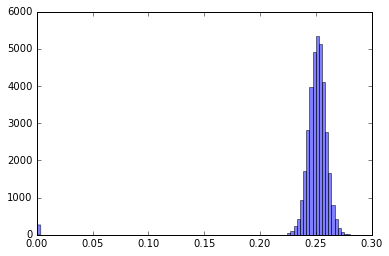

In [10]:
detArrays = pointData

fig2, ax2 = plt.subplots(1, 1)
ax2.hist(detArrays['ebeamcharge'], bins=100,normed=False, alpha=0.5);